# Part A

## Q1.  
GroupName:P2violet , MemberNames: Yifu Deng, Jiangqiu Shen, Zhiyuan Lu

## Q2.

### (a)

In [58]:
import hierarchy as hierarchy
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import csv

[[0 4]
 [1 3]
 [1 4]
 [2 5]
 [4 0]
 [5 1]
 [5 2]
 [6 1]]
[[0]
 [1]
 [1]
 [2]
 [4]
 [5]
 [5]
 [6]]
[[4]
 [3]
 [4]
 [5]
 [0]
 [1]
 [2]
 [1]]


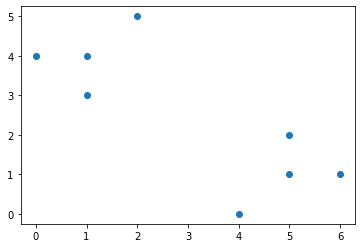

In [7]:
#define List
data2 = [[0,4],[1,3],[1,4],[2,5],[4,0],[5,1],[5,2],[6,1]]
np_data2=np.array(data2,dtype=np.int32)
print(np_data2)
x1 = np_data2[:,0:1]
x2 = np_data2[:,1:2]
print(x1)
print(x2)
plt.scatter(x1,x2)
plt.show()

### (b)

In [8]:
grp1 = [[1,3],[1,4],[4,0],[5,1]]
grp2 = [[0,4],[2,5],[5,2],[6,1]]
np_grp1 = np.array(grp1,dtype=np.int32)
np_grp2 = np.array(grp2,dtype=np.int32)

In [4]:
def centroid(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:,0])
    sum_y = np.sum(arr[:,1])
    return [sum_x/length,sum_y/length]

In [66]:
grp1_ctr = centroid(np_grp1)
grp2_ctr = centroid(np_grp2)
print('Group1 centroid',grp1_ctr,'Group2 centroid',grp2_ctr)

Group1 centroid [2.75, 2.0] Group2 centroid [3.25, 3.0]


### (c)

In [6]:
for x in np_data2:
    print(x)

[0 4]
[1 3]
[1 4]
[2 5]
[4 0]
[5 1]
[5 2]
[6 1]


In [11]:
def regroup(points,c1,c2,group1,group2):
    for point in points:
        dist1 = distance.euclidean(point,c1)
        dist2 = distance.euclidean(point,c2)
        if dist1<dist2:
            group1.append(point)
        else:
            group2.append(point)

In [12]:
newgrp1=[]
newgrp2=[]
regroup(np_data2,grp1_ctr,grp2_ctr,newgrp1,newgrp2)
np_ngrep1=np.asarray(newgrp1)
np_ngrep2=np.asarray(newgrp2)
print(np_ngrep1)
print(np_ngrep2)

[[1 3]
 [4 0]
 [5 1]]
[[0 4]
 [1 4]
 [2 5]
 [5 2]
 [6 1]]


### (d)

In [51]:
def print_the_table(data,center1,center2):
    fig,(ax1,ax2)=plt.subplots(2)
    ax1.axis('tight')
    ax1.axis('off')
    ax2.axis('tight')
    ax2.axis('off')
    center_table=[["centers","X1","X2"],["Group1",center1[0],center1[1]],["Group2",center2[0],center2[1]]]
    ax1.table(center_table,loc='center')
    sample_table=[]
    sample_table.append(["Sample","d2c1","d2c2","Group"])
    for i,d in enumerate(data):
        dist1 = distance.euclidean(d,center1)
        dist2 = distance.euclidean(d,center2)
        group=0
        if dist1<dist2:
            group=1
        else:
            group=2
        dist1="{:.5f}".format(dist1)
        dist2="{:.5f}".format(dist2)
        sample_table.append([i+1,dist1,dist2,group])
    ax2.table(sample_table,loc='center')



def within_cluster_variation(group1,group2,ctr1,ctr2):
    d2c1sum=0
    d2c2sum=0
    for x in group1:
        d2c1sum=d2c1sum+distance.euclidean(x,ctr1)
    for x in group2:
        d2c2sum=d2c2sum+distance.euclidean(x,ctr2)
    return d2c1sum+d2c2sum

loop1

restore to the origin group, inorder to print the whole progress

[2.75, 2.0] [3.25, 3.0]
[[1 3]
 [4 0]
 [5 1]]
[[0 4]
 [1 4]
 [2 5]
 [5 2]
 [6 1]]
within-cluster variance  20.47328359544335


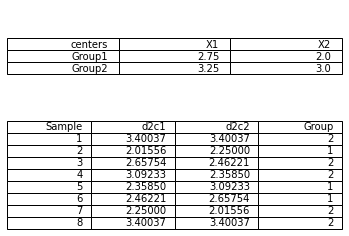

In [52]:
grp1_ctr0 = centroid(np_grp1)
grp2_ctr0 = centroid(np_grp2)

print_the_table(np_data2,grp1_ctr0,grp2_ctr0)
new1=[]
new2=[]
regroup(np_data2,grp1_ctr0,grp2_ctr0,new1,new2)
np_new1=np.asarray(new1)
np_new2=np.asarray(new2)

print('within-cluster variance ',within_cluster_variation(np_new1,np_new2,grp1_ctr0,grp2_ctr0))


loop2

within-cluster variance  16.335523445399936


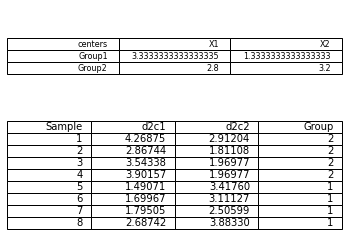

In [53]:
grp1_ctr1 = centroid(np_new1)
grp2_ctr1 = centroid(np_new2)
print_the_table(np_data2,grp1_ctr1,grp2_ctr1)

new1=[]
new2=[]
regroup(np_data2,grp1_ctr1,grp2_ctr1,new1,new2)
np_new1=np.asarray(new1)
np_new2=np.asarray(new2)

print('within-cluster variance ',within_cluster_variation(np_new1,np_new2,grp1_ctr1,grp2_ctr1))

loop2

within-cluster variance  6.82842712474619


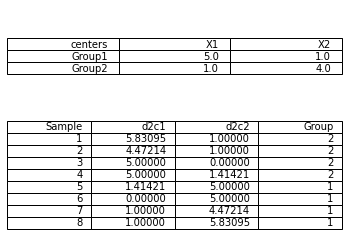

In [54]:
grp1_ctr1 = centroid(np_new1)
grp2_ctr1 = centroid(np_new2)
print_the_table(np_data2,grp1_ctr1,grp2_ctr1)

new1=[]
new2=[]
regroup(np_data2,grp1_ctr1,grp2_ctr1,new1,new2)
np_new1=np.asarray(new1)
np_new2=np.asarray(new2)

print('within-cluster variance ',within_cluster_variation(np_new1,np_new2,grp1_ctr1,grp2_ctr1))

### (e)

color of group1:red,coclor of group2:green,centroid point shape:+


<ipython-input-55-7fc91a8ae045>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


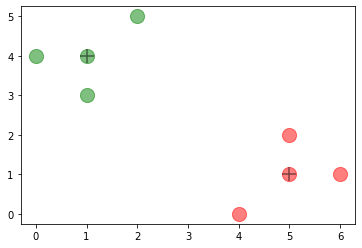

In [55]:
fig,ax=plt.subplots()
ax.scatter(np_new1[:,0],np_new1[:,1],c="red",marker='o',alpha=0.5,s=200)
ax.scatter(np_new2[:,0],np_new2[:,1],c="green",marker='o',alpha=0.5,s=200)
ax.scatter(grp1_ctr1[0],grp1_ctr1[1],marker="+",c="black",alpha=0.5,s=200)
ax.scatter(grp2_ctr1[0],grp2_ctr1[1],marker="+",c="black",alpha=0.5,s=200)
fig.show()
print("color of group1:red,coclor of group2:green,centroid point shape:+")

## Q3

### (a) and (b)

Step 1

Combine 2 and 5

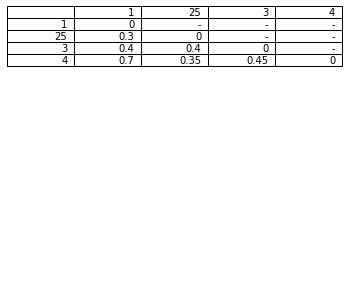

In [61]:
matrix=[[" ",1,25,3,4],
        [1,0,"-","-","-"],
        [25,0.3,0,"-","-"],
        [3,0.4,0.4,0,"-"],
        [4,0.7,0.35,0.45,0]]
fig,ax=plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(matrix,loc="top")


Step 2

Combine 1 and 25

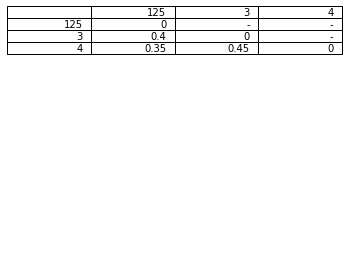

In [63]:
matrix=[[" ",125,3,4],
        [125,0,"-","-"],
        [3,0.4,0,"-"],
        [4,0.35,0.45,0]]
fig,ax=plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(matrix,loc="top")

Step 3

Combine 4 and 125

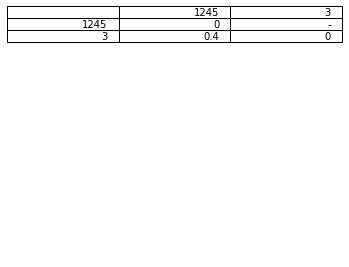

In [64]:
matrix=[[" ",1245,3],
        [1245,0,"-"],
        [3,0.4,0]]
fig,ax=plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(matrix,loc="top")

Step 4

Combine 3 and 1245

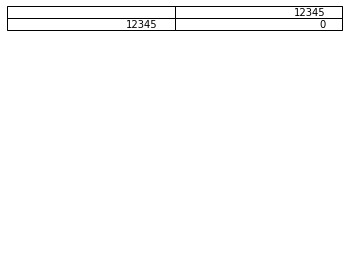

In [65]:
matrix=[[" ",12345],
        [12345,0]]
fig,ax=plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(matrix,loc="top")


### (c)

In [ ]:
fig,ax=plt.subplots()
ax.plot()


# Part B

## Q4

In [16]:
from sklearn.preprocessing import MinMaxScaler

1. min-max normalization with min=0 and max=1

In [17]:
data4 = np.asarray([20,30,40,60,120])
data4 = data4.reshape(-1,1)
#print(data4.shape)
#print(data4)
scaler = MinMaxScaler((0,1))
data4_scaled = scaler.fit_transform(data4)
print(data4_scaled)

[[0. ]
 [0.1]
 [0.2]
 [0.4]
 [1. ]]


2.min-max normalization with min=-1 and max=1

In [18]:
data4 = np.asarray([20,30,40,60,120])
data4 = data4.reshape(-1,1)
#print(data4.shape)
#print(data4)
scaler = MinMaxScaler((-1,1))
data4_scaled = scaler.fit_transform(data4)
print(data4_scaled)

[[-1. ]
 [-0.8]
 [-0.6]
 [-0.2]
 [ 1. ]]


3.z-core normalization

In [19]:
from scipy import stats
data4 = np.asarray([20,30,40,60,120])
data4_scaled = stats.zscore(data4)
print(data4_scaled)

[-0.95632472 -0.67505274 -0.39378077  0.16876319  1.85639504]


## Q5

In [20]:
data5 = [[1.4,1.3,2.9],[1.8,1.1,3.2],[1.3,1.2,2.9],[0.9,3.3,3.1],[1.5,2.1,3.3]]
new_point = [[1.25,1.74,3.01]]

### (a)

In [21]:
from scipy.spatial.distance import cdist
#Manhattan Distance
man_dist = cdist(data5,new_point,metric='cityblock')
print(man_dist)
#Euclidean Distance
eucl_dist = cdist(data5,new_point,metric='euclidean')
print(eucl_dist)
#Minkowski Distance(3)
mink_dist = cdist(data5,new_point,metric='minkowski',p=3)
print(mink_dist)
#Supermum Distance
sup_dist = cdist(data5,new_point,metric='chebyshev')
print(sup_dist)
#Cosine Similarity
cosine_dist = cdist(data5,new_point,metric='cosine')
#print(cosine_dist)
print(1-cosine_dist)

[[0.7 ]
 [1.38]
 [0.7 ]
 [2.  ]
 [0.9 ]]
[[0.47770284]
 [0.86498555]
 [0.55335341]
 [1.60131196]
 [0.52554733]]
[[0.44795782]
 [0.75791789]
 [0.54165928]
 [1.56594978]
 [0.4425438 ]]
[[0.44]
 [0.64]
 [0.54]
 [1.56]
 [0.36]]
[[0.99302539]
 [0.97425531]
 [0.99132894]
 [0.94973001]
 [0.99898186]]


### (b)

In [22]:
data5 = [[1.4,1.3,2.9],[1.8,1.1,3.2],[1.3,1.2,2.9],[0.9,3.3,3.1],[1.5,2.1,3.3]]
new_point = [[1.25,1.74,3.01]]
print(data5)
data5_t = data5
print(new_point[0])
data5_t.append(new_point[0])
print(data5_t)
scaler = MinMaxScaler((0,1))
data5_t_scaled = scaler.fit_transform(data5_t)
print(data5_t_scaled)
data5_scaled = data5_t_scaled[:-1,:]
print(data5_scaled)
newpoint_scaled = data5_t_scaled[-1:,:]
print(newpoint_scaled)
#Euclidean Distance
eucl_dist = cdist(data5_scaled,newpoint_scaled,metric='euclidean')
print(eucl_dist)

[[1.4, 1.3, 2.9], [1.8, 1.1, 3.2], [1.3, 1.2, 2.9], [0.9, 3.3, 3.1], [1.5, 2.1, 3.3]]
[1.25, 1.74, 3.01]
[[1.4, 1.3, 2.9], [1.8, 1.1, 3.2], [1.3, 1.2, 2.9], [0.9, 3.3, 3.1], [1.5, 2.1, 3.3], [1.25, 1.74, 3.01]]
[[0.55555556 0.09090909 0.        ]
 [1.         0.         0.75      ]
 [0.44444444 0.04545455 0.        ]
 [0.         1.         0.5       ]
 [0.66666667 0.45454545 1.        ]
 [0.38888889 0.29090909 0.275     ]]
[[0.55555556 0.09090909 0.        ]
 [1.         0.         0.75      ]
 [0.44444444 0.04545455 0.        ]
 [0.         1.         0.5       ]
 [0.66666667 0.45454545 1.        ]]
[[0.38888889 0.29090909 0.275     ]]
[[0.37868559]
 [0.82686752]
 [0.37277252]
 [0.83944594]
 [0.79344965]]


## Q6

['Num', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Generation', 'Legendary']
['1', 'Bulbasaur', 'Grass', 'Poison', '318', '45', '49', '49', '65', '65', '45', '1', 'False']
800
(800, 13)
(800, 6)


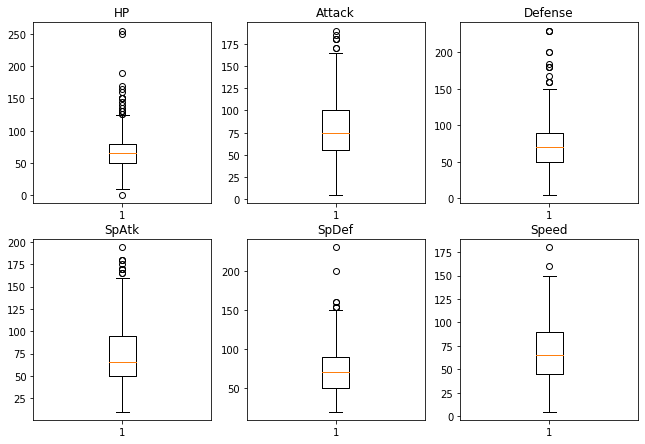

In [23]:
#Read POKEMON DATA
data6=[]
with open('P2-data/Pokemon.csv') as csvfile:
    csv_reader = csv.reader(csvfile)
    d_header = next(csv_reader)
    for row in csv_reader:
        data6.append(row)
col_name=d_header
print(col_name)
print(data6[0])
#print(nfl_data[0][4])
print(len(data6))
np_data6=np.asarray(data6)
print(np_data6.shape)

#get 1-D int32 Array for HP, Attack, ...
HP=np.array(np_data6[:,5:6],dtype=np.int32)
HP = HP.reshape(-1)
Attack=np.array(np_data6[:,6:7],dtype=np.int32)
Attack = Attack.reshape(-1)
Defense=np.array(np_data6[:,7:8],dtype=np.int32)
Defense = Defense.reshape(-1)
SpAtk=np.array(np_data6[:,8:9],dtype=np.int32)
SpAtk = SpAtk.reshape(-1)
SpDef=np.array(np_data6[:,9:10],dtype=np.int32)
SpDef = SpDef.reshape(-1)
Speed=np.array(np_data6[:,10:11],dtype=np.int32)
Speed = Speed.reshape(-1)
proc_data = np.array(np_data6[:,5:11],dtype=np.int32)
print(proc_data.shape)

#boxplots
fig, axs = plt.subplots(2,3)
axs[0,0].boxplot(HP)
axs[0,0].set_title('HP')
axs[0,1].boxplot(Attack)
axs[0,1].set_title('Attack')
axs[0,2].boxplot(Defense)
axs[0,2].set_title('Defense')
axs[1,0].boxplot(SpAtk)
axs[1,0].set_title('SpAtk')
axs[1,1].boxplot(SpDef)
axs[1,1].set_title('SpDef')
axs[1,2].boxplot(Speed)
axs[1,2].set_title('Speed')
plt.subplots_adjust(left=-0.5, bottom=-0.5)
plt.show()

### (b)

In [24]:
scaler=MinMaxScaler((0,1))
data_scaled = scaler.fit_transform(proc_data)
print(proc_data)
print(data_scaled)

[[ 45  49  49  65  65  45]
 [ 60  62  63  80  80  60]
 [ 80  82  83 100 100  80]
 ...
 [ 80 110  60 150 130  70]
 [ 80 160  60 170 130  80]
 [ 80 110 120 130  90  70]]
[[0.17322835 0.23783784 0.19555556 0.29891304 0.21428571 0.22857143]
 [0.23228346 0.30810811 0.25777778 0.38043478 0.28571429 0.31428571]
 [0.31102362 0.41621622 0.34666667 0.48913043 0.38095238 0.42857143]
 ...
 [0.31102362 0.56756757 0.24444444 0.76086957 0.52380952 0.37142857]
 [0.31102362 0.83783784 0.24444444 0.86956522 0.52380952 0.42857143]
 [0.31102362 0.56756757 0.51111111 0.65217391 0.33333333 0.37142857]]


### (C)

In [60]:
from sklearn import cluster
ccenters=[]
for x in range(2,9):
    data = data_scaled
    km = cluster.KMeans(n_clusters=x)
    km.fit(data)
    ccenters.append(km.cluster_centers_)
print(len(ccenters))

7
[[0.35643655 0.6672533  0.39540052 0.62670627 0.37009967 0.50784053]
 [0.31177116 0.55901471 0.42666667 0.26114474 0.23200723 0.26502712]
 [0.20929985 0.25598977 0.22987988 0.18753672 0.13777349 0.16752896]
 [0.19107971 0.27541651 0.18584475 0.22777695 0.15003262 0.36152642]
 [0.29252392 0.5404243  0.32310633 0.28325152 0.25110087 0.53683564]
 [0.26800663 0.36136558 0.29099415 0.51762014 0.30601504 0.56186466]
 [0.33448163 0.36369369 0.31003704 0.43129529 0.31214286 0.30119048]
 [0.24325937 0.36756757 0.636633   0.31274704 0.46637807 0.23134199]]


In [63]:
print(km.cluster_centers_)
print(km.labels_)

[[0.35643655 0.6672533  0.39540052 0.62670627 0.37009967 0.50784053]
 [0.31177116 0.55901471 0.42666667 0.26114474 0.23200723 0.26502712]
 [0.20929985 0.25598977 0.22987988 0.18753672 0.13777349 0.16752896]
 [0.19107971 0.27541651 0.18584475 0.22777695 0.15003262 0.36152642]
 [0.29252392 0.5404243  0.32310633 0.28325152 0.25110087 0.53683564]
 [0.26800663 0.36136558 0.29099415 0.51762014 0.30601504 0.56186466]
 [0.33448163 0.36369369 0.31003704 0.43129529 0.31214286 0.30119048]
 [0.24325937 0.36756757 0.636633   0.31274704 0.46637807 0.23134199]]
[2 6 6 0 3 3 5 0 0 2 6 6 0 2 2 6 2 2 3 4 3 3 4 5 3 4 3 4 3 4 3 5 2 1 2 3 6
 2 3 4 2 6 3 5 2 6 3 4 2 6 6 2 1 2 5 3 4 3 4 3 5 3 4 3 0 3 3 1 3 5 5 5 2 1
 1 2 6 6 3 5 2 1 1 4 4 2 6 7 2 5 3 3 4 2 6 2 1 2 7 3 5 5 5 7 2 6 1 1 3 5 2
 6 2 1 4 4 2 2 1 2 1 6 6 4 4 3 5 3 6 3 5 5 4 5 5 5 4 4 4 3 4 0 6 2 3 6 5 0
 6 2 6 3 4 4 4 1 6 5 0 3 6 0 0 0 0 0 2 6 6 3 3 5 2 1 4 2 4 2 6 3 3 2 1 4 3
 6 3 2 2 2 6 3 5 2 6 6 0 6 2 6 1 6 2 3 5 3 2 6 3 2 1 5 7 3 6 5 3 2 5 2 1

### (d)

In [3]:
from gapstat import GapStatClustering

## Q7

In [9]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn import cluster
import random
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import csv
%matplotlib inline

In [11]:
##Read Music Data
data7=[]
with open('P2-data/music2.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    d_header = next(csv_reader)
    for row in csv_reader:
        data7.append(row)
col_name = d_header
print(col_name)
print(data7[0])
print(len(data7))
np_d7 = np.asarray(data7)
#num_cols contains all numeric columns
num_cols = np.asarray(np_d7[:,3:8],dtype=np.float)
print(num_cols[0])
#str_cols contains all string columns
str_cols=np.asarray(np_d7[:,0:3])
d7 = np.c_[str_cols,num_cols]
#print(d7)

['Song', 'Artist', 'Type', 'LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']
['Dancing Queen', 'Abba', 'Rock', ' 17600755.6', '-90.0068667', '29921', '105.92095', ' 59.57379']
62
[ 1.76007556e+07 -9.00068667e+01  2.99210000e+04  1.05920950e+02
  5.95737900e+01]


In [13]:
#standardize data
from sklearn.preprocessing import StandardScaler
stad_data = StandardScaler().fit_transform(num_cols)
#print(stad_data)

[[-8.96906973e-02 -1.75513826e+00  8.55543282e-01  3.47807905e-01
  -9.80360294e-01]
 [-3.97088737e-01 -1.45108013e+00  5.91458301e-01 -2.19448307e-01
  -9.86599396e-01]
 [-4.15916987e-01 -1.92715262e+00  4.47160887e-01 -3.13466622e-01
  -6.09372679e-01]
 [-4.72837633e-01 -1.76504983e+00  7.37826970e-01 -4.43732961e-01
  -1.04203159e+00]
 [-5.21483952e-01 -1.73262804e+00  6.27590189e-01 -6.85678229e-01
  -8.97931890e-01]
 [-5.83149423e-01 -1.30704106e+00  3.50387262e-01 -6.95291900e-01
  -8.55817837e-01]
 [-6.32598585e-01 -1.36388127e+00 -8.96047819e-01  1.04323493e-01
   4.21041828e-01]
 [-7.17817113e-01 -1.28138005e+00 -1.56011511e+00  5.87836021e-02
   2.63984011e-01]
 [-5.26647211e-01 -1.46205582e+00  5.47731812e-02 -3.28953679e-01
  -3.77925319e-01]
 [-6.28279630e-01 -1.41613271e+00 -8.01920798e-01  6.12146029e-02
  -4.83030520e-01]
 [-6.20862830e-01  1.58989270e+00  2.00566502e-01 -8.78453655e-01
   5.59982239e-01]
 [-7.31717631e-01  6.29108820e-01 -1.78933396e+00  6.21230102e-02

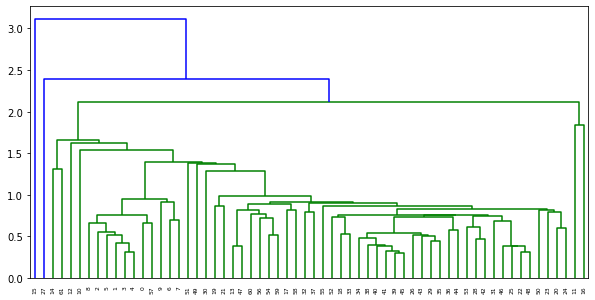

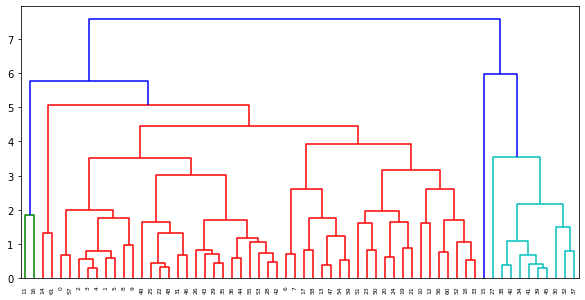

In [19]:
#Type
#single
modelSingle = cluster.AgglomerativeClustering(distance_threshold=0,
                                              n_clusters=None,
                                              linkage="single")
modelSingle = modelSingle.fit(stad_data)
ypred = modelSingle.fit_predict(stad_data)
Z = hierarchy.linkage(stad_data, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
#complete
modelComplete = cluster.AgglomerativeClustering(distance_threshold=0, 
                                                n_clusters=None, 
                                                linkage="complete")
modelComplete = modelComplete.fit(stad_data)
ypred = modelComplete.fit_predict(stad_data)
Z = hierarchy.linkage(stad_data, 'complete')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)

In [15]:
#Artist